In [4]:
!git clone https://github.com/hayamatomoe/WeaveSynthesizer.git
import os
path = '/content/WeaveSynthesizer'

os.chdir(path)

!ls

Cloning into 'WeaveSynthesizer'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 11 (delta 0), reused 11 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.
sample.ipynb  torchweave


In [5]:
import torchweave.structures as tws
import torchweave.functions as twf
import importlib
import functools
import math
import numpy as np
import torch
import matplotlib.pyplot as plt

# 緯糸(weft)，経糸(warp)

In [6]:
multWeave = 3
# thrLen = 2000//multWeave # warp 9024px=150cm
thrLen = 9024//multWeave # warp 9024px=150cm
# n2:9024
# n4:5120
# n6:4608
trdLen = 512 # weft 1152px=70cm, 500cm=8228, 800cm=12665
# trdLen = 12665 # weft 1152px=70cm, 500cm=8228, 800cm=12665
tuLen = 512
asp=trdLen*3.8/(thrLen*multWeave)

## layer1

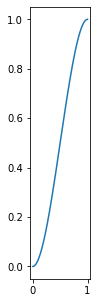

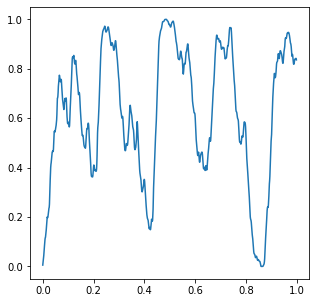

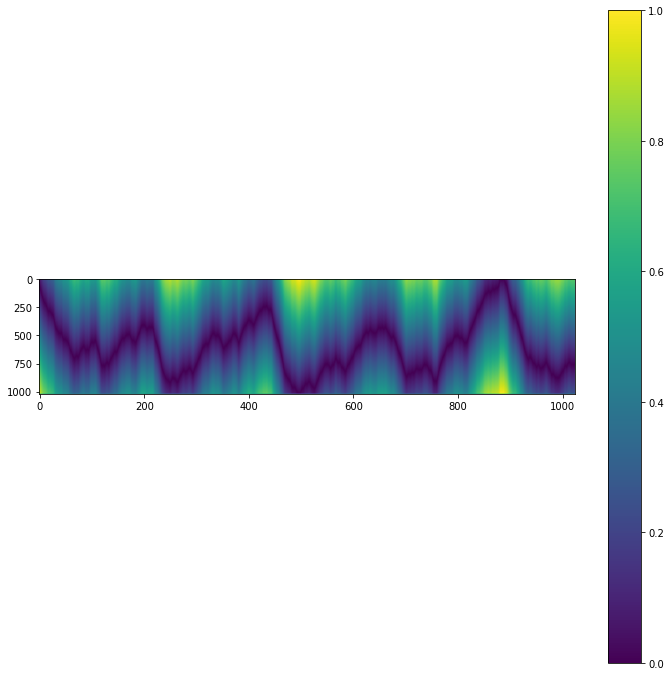

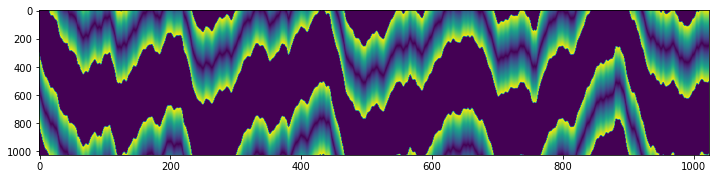

In [7]:

def func1a(x):
    return x

wav1a=tws.Wav(func1a)   
wav1a.plot(aspect=asp)

def func1b(x):  #そうこう
    freq =6
    func=functools.partial(twf.fbm, H=1., freq=freq, phase=74, itr=7, func=twf.vnoise_)
    n = twf.warp(x, func=func, wt=.1/freq, itr=2)
    s = twf.fbm(x, H=1., freq=freq*1.5, phase=0, itr=6, func=twf.sin_)
    return torch.lerp(n, s, 0.3)



wav1b=tws.Wav(func1b)   
wav1b.plot()

b1 = tws.density(wav1a,wav1b, a=1)
tws.densityplot(b1, aspect=asp, bar = True)

lev1=[0.25,0.75]
b1_bin = tws.density(wav1a,wav1b, a=1, levels=lev1)
tws.densityplot(b1_bin*torch.abs(b1-0.5), aspect=asp)


## layer2

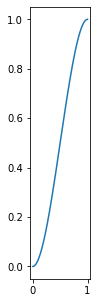

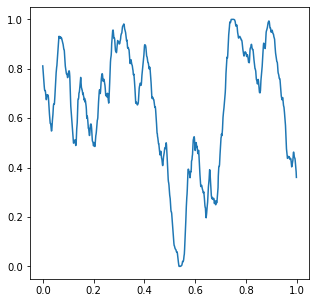

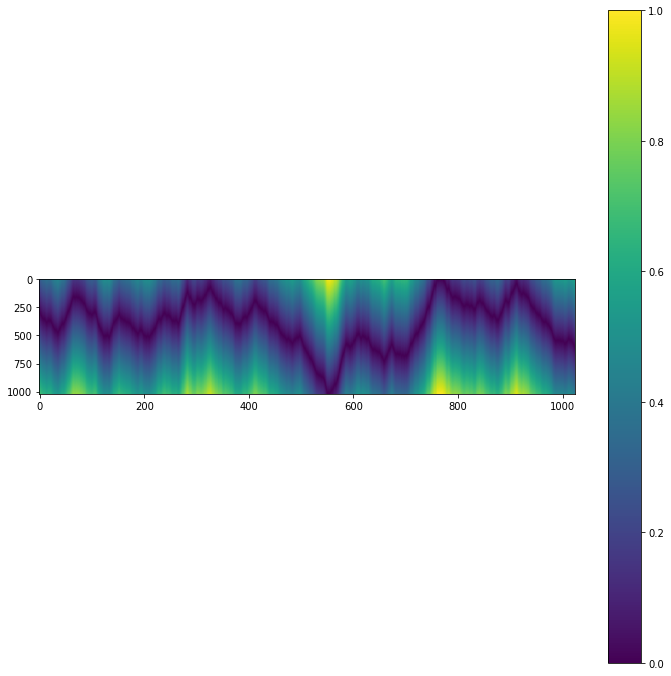

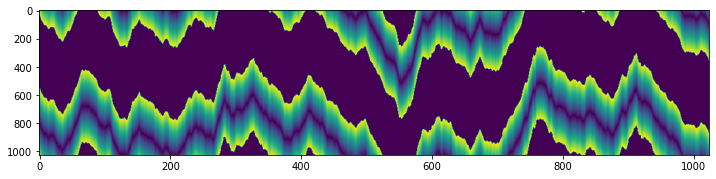

In [8]:
def func2a(x):
    return x
wav2a=tws.Wav(func2a)   
wav2a.plot(aspect=asp)


def func2b_(x,freq):  #そうこう
    func=functools.partial(twf.fbm, H=1., freq=freq, phase=1345, itr=8, func=twf.vnoise_)
    n = twf.warp(x, func=func, wt=.1/freq, itr=3)
    s = twf.fbm(x, H=1., freq=12., phase=0.45, itr=6, func=twf.sin_)
    return torch.lerp(n, s, 0.2)
def func2b(x):
    return func2b_(x, 6)
wav2b=tws.Wav(func2b)   
wav2b.plot()

b2 = tws.density(wav2a,wav2b, a=-1)
tws.densityplot(b2, aspect=asp, bar = True)

lev2=[0.25,0.75]
b2_bin = tws.density(wav2a,wav2b, a=-1, levels=lev2)
tws.densityplot(b2_bin*torch.abs(b2-0.5), aspect=asp)

## layer3

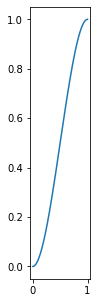

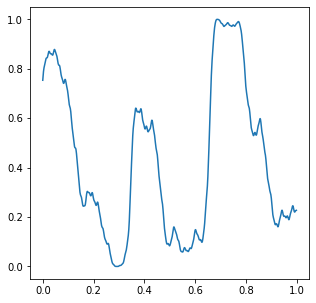

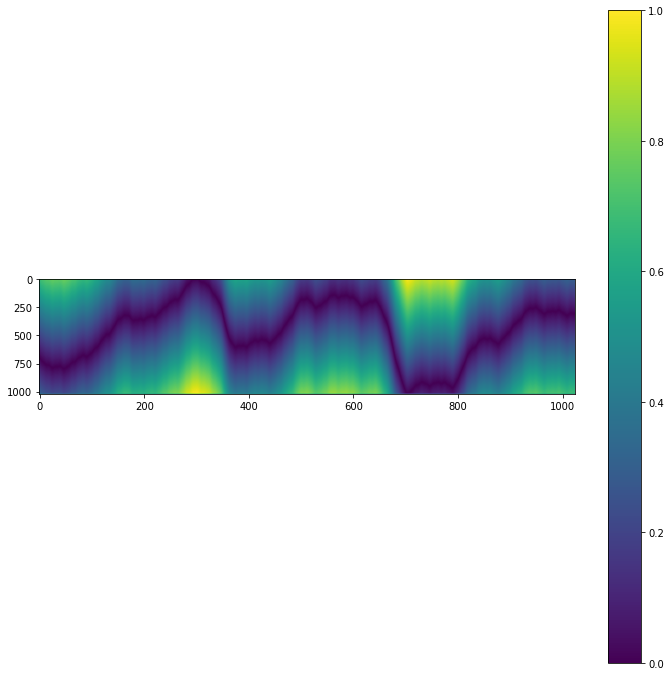

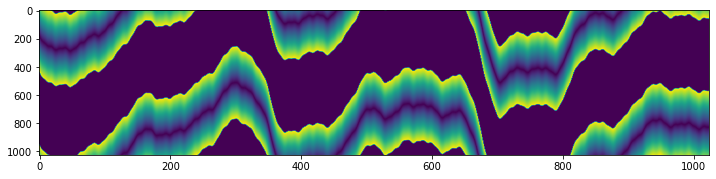

In [9]:
importlib.reload(twf)
# def func3a_(x, freq):  #踏み木
#     func=functools.partial(twf.fbm, H=1., freq=freq, phase=293, itr=8, func=twf.vnoise_)
#     n = twf.warp(x, func=func, wt=.1/freq, itr=3)
#     s = twf.fbm(x, H=1., freq=freq*1.5, phase=0.5, itr=5, func=twf.sin_)
#     return torch.lerp(n, s, 0.35)
# def func3a(x):
#     n = 3
#     start=20
#     end=5
#     m = torch.floor(x*n)
#     f = torch.frac(x*n)
#     f = twf.smoothstep(f, 0.35, 0.65)
#     freq1 = twf.lerp(start, end, twf.smoothstep(m/n))
#     freq2 = twf.lerp(start, end, twf.smoothstep((m+1)/n))
#     return torch.lerp(func3a_(x, freq1),func3a_(x,freq2),f)


# テストパターン
def func3a(x):
    return x

wav3a=tws.Wav(func3a)   
wav3a.plot(aspect=asp)

def func3b_(x,freq):  #そうこう
    func=functools.partial(twf.fbm, H=1., freq=freq, phase=636, itr=4, func=twf.vnoise_)
    n = twf.warp(x, func=func, wt=.1/freq, itr=2)
    s = twf.fbm(x, H=1., freq=freq*1.5, phase=0, itr=6, func=twf.sin_)
    return torch.lerp(n, s, 0.25)
def func3b(x):
    return func3b_(x, 4)
wav3b=tws.Wav(func3b)   
wav3b.plot()

b3 = tws.density(wav3a,wav3b, a=1)
tws.densityplot(b3, aspect=asp, bar = True)

lev3=[0.25,0.75]
b3_bin = tws.density(wav3a,wav3b, a=1, levels=lev3)

tws.densityplot(b3_bin*torch.abs(b3-0.5), aspect=asp)

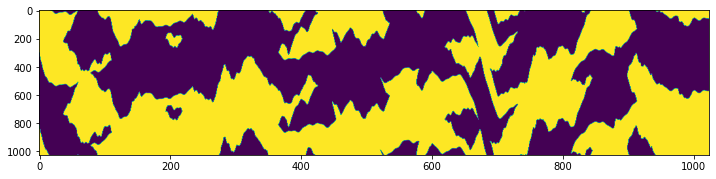

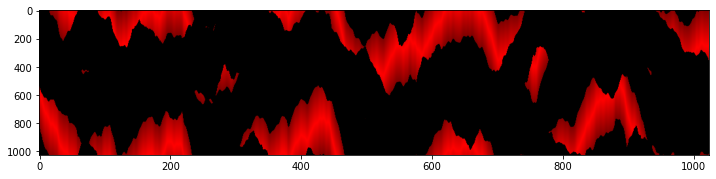

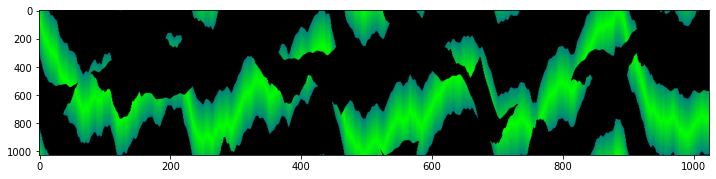

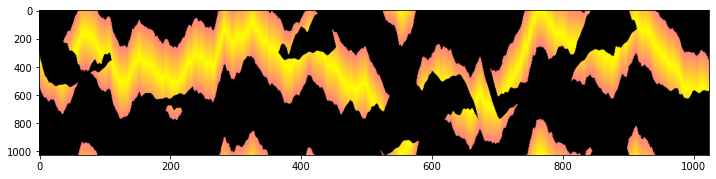

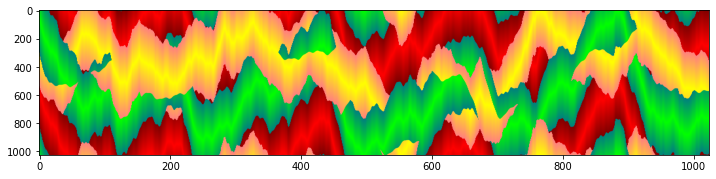

In [10]:
b3_ = (b3_bin + b2_bin - b1_bin) > 0
tws.densityplot(b3_.float(), aspect=asp)
lay2 = torch.logical_and(torch.logical_not(b1_bin), b3_) #箔
lay1 = torch.logical_and(b1_bin, b2_bin) #銀糸 
lay3 = torch.logical_and(torch.logical_not(b2_bin), torch.logical_not(b3_)) #綿

lay1_=torch.unsqueeze(lay1.float(),dim=2)*tws.colorize(torch.abs(2*(b1-0.5)),[torch.Tensor([1,0,0]),torch.Tensor([0,0,0])])
tws.densityplot(lay1_, aspect=asp)

lay2_=torch.unsqueeze(lay2.float(),dim=2)*tws.colorize(torch.abs(2*(b1-0.5)),[torch.Tensor([0,0,1]),torch.Tensor([0,1,0])])
tws.densityplot(lay2_, aspect=asp)

lay3_=torch.unsqueeze(lay3.float(),dim=2)*tws.colorize(torch.abs(2*(b2-0.5)),[torch.Tensor([1,0,1]),torch.Tensor([1,1,0])])
tws.densityplot(lay3_, aspect=asp)
tws.densityplot(lay1_+lay2_+lay3_,aspect=asp)


## 綜絖(thread), 踏み木(treadling)

In [11]:
importlib.reload(tws)
line=32
thr1=wav1b.sparse(wd=thrLen, ht=tuLen, n=line)
trd1=wav1a.sparse(wd=trdLen, ht=tuLen, n=line)
thr2=wav2b.sparse(wd=thrLen, ht=tuLen, n=line)
trd2=wav2a.sparse(wd=trdLen, ht=tuLen, n=line)
thr3=wav3b.sparse(wd=thrLen, ht=tuLen, n=line)
trd3=wav3a.sparse(wd=trdLen, ht=tuLen, n=line)

# Tie-Up
## sequence function

In [12]:
importlib.reload(tws)
def shade(n, step=1):
    a = torch.arange(1,1+n//2, step)
    a_ = n-a
    a_ = a_.flip(0)
    b = torch.cat([a, a_], 0).reshape(1,-1)
    c = torch.cat([sym(b),sym(b.flip(1))], 0).reshape(1,-1)
    return c
def sym(s):
    c = torch.cat([s,s.flip(1)],0)
    c = c.transpose(0,1).flatten()
    return c
def reverse(s):
    zero = torch.tensor([[0]])
    return torch.cat([zero, s], dim=1)
def dotSeq(t, lng=9, itr = 1):
    seq = list(t.squeeze())
    for i in range(itr):
        nlist = []
        for j in list(seq):
            if j < lng:
                nlist.append(j)
            else:
                nlist += [math.ceil(j / 2),
                    1,
                    j - math.ceil(j / 2) - 1]
        seq = nlist
    return torch.tensor(nlist,dtype=torch.long).reshape(1,-1)

## Tie-up sequence

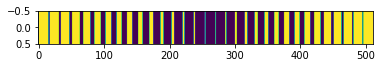

<Figure size 1440x1440 with 0 Axes>

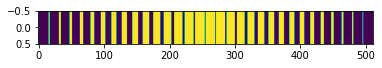

<Figure size 1440x1440 with 0 Axes>

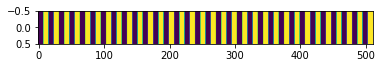

<Figure size 1440x1440 with 0 Axes>

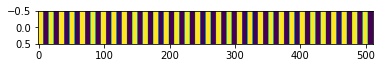

<Figure size 1440x1440 with 0 Axes>

In [13]:
importlib.reload(tws)
tuSeq1_ = shade(16, 1)
tuSeq1r_ = reverse(tuSeq1_)
# tuSeq1 = dotSeq(tuSeq1, itr=1, lng=20)
tuSeq1 = tws.Seq(tuSeq1_)
tuSeq1r = tws.Seq(tuSeq1r_)
tuSeq1.plot(wd=tuLen)
tuSeq1r.plot(wd=tuLen)

tuSeq2_ = torch.tensor([[8 for i in range(64)]])
tuSeq2r_ = reverse(tuSeq2_)
# tuSeq1 = dotSeq(tuSeq1, itr=1, lng=20)
tuSeq2 = tws.Seq(tuSeq2_)
tuSeq2r = tws.Seq(tuSeq2r_)
tuSeq2.plot(wd=tuLen)
tuSeq2r.plot(wd=tuLen)

## color

In [14]:
# color simulation
r = torch.tensor([255,0,0], dtype=torch.uint8).reshape(1,1,1,3)
y = torch.tensor([255,255,0], dtype=torch.uint8).reshape(1,1,1,3)
g = torch.tensor([0,255,0], dtype=torch.uint8).reshape(1,1,1,3)
b = torch.tensor([0,0,255], dtype=torch.uint8).reshape(1,1,1,3)
p = torch.tensor([255,0,255], dtype=torch.uint8).reshape(1,1,1,3)
d = torch.tensor([0,0,0], dtype=torch.uint8).reshape(1,1,1,3)

red = torch.tensor([247,36,71], dtype=torch.uint8).reshape(1,1,1,3)
turq = torch.tensor([0,192,255], dtype=torch.uint8).reshape(1,1,1,3)
green = torch.tensor([0,145,68], dtype=torch.uint8).reshape(1,1,1,3)
mint = torch.tensor([0,244,172], dtype=torch.uint8).reshape(1,1,1,3)
citron = torch.tensor([237,229,0], dtype=torch.uint8).reshape(1,1,1,3)
purple = torch.tensor([234,119,255], dtype=torch.uint8).reshape(1,1,1,3)
orange = torch.tensor([255,132,0], dtype=torch.uint8).reshape(1,1,1,3)
gray = torch.tensor([125,125,125], dtype=torch.uint8).reshape(1,1,1,3)
white = torch.tensor([240,240,240], dtype=torch.uint8).reshape(1,1,1,3)
black = torch.tensor([20,20,20], dtype=torch.uint8).reshape(1,1,1,3)
almi = torch.tensor([208,208,208], dtype=torch.uint8).reshape(1,1,1,3)
silver = torch.tensor([218,214,181], dtype=torch.uint8).reshape(1,1,1,3)
gold = torch.tensor([255,213,113], dtype=torch.uint8).reshape(1,1,1,3)


# color1 = torch.cat([black,almi], 0).cuda()  #銀糸
# color1_back = torch.flip(color1,(0,))

# color2 = torch.cat([gold,silver], 0).cuda() #箔
# color2_back = torch.flip(color2,(0,))

# color3 = torch.cat([red,white], 0).cuda()   #綿
# color3_back = torch.flip(color3,(0,))

color1 = torch.cat([d,r], 0).cuda()  #銀糸
color1_back = torch.flip(color1,(0,))

color2 = torch.cat([g,b], 0).cuda() #箔
color2_back = torch.flip(color2,(0,))

color3 = torch.cat([y,p], 0).cuda()   #綿
color3_back = torch.flip(color3,(0,))

## tie-up matrix

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
%mkdir img

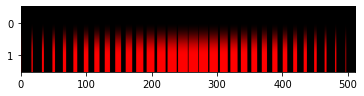

<Figure size 1440x1440 with 0 Axes>

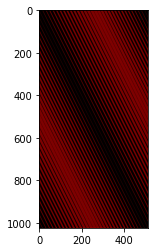

<Figure size 1440x1440 with 0 Axes>

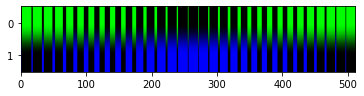

<Figure size 1440x1440 with 0 Axes>

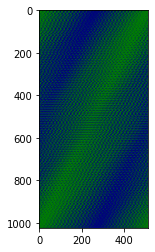

<Figure size 1440x1440 with 0 Axes>

21-0322-1333-44381941_color_5_


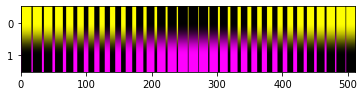

<Figure size 1440x1440 with 0 Axes>

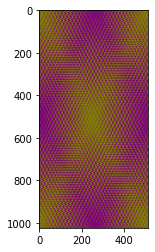

<Figure size 1440x1440 with 0 Axes>

In [19]:
importlib.reload(tws)
n=5
tu_sat = [0,11]
tu_sat_ = [n,11]
s = tuSeq1.copy()
s.append(tuSeq1r)
s.plot(color=color1, wd=tuLen)
tu1 = s.roll([1,1,1], diff = tu_sat, wd=tuLen)
tu1.plot(color=color1)

s = tuSeq1.copy()
s.append(tuSeq1r)
s.plot(color=color2, wd=tuLen)
tu2 = s.roll([-1,-1,-1,-2], diff = tu_sat_, wd=tuLen)
tu2.plot(color=color2, save=True, name=str(n))

s = tuSeq1.copy()
s.append(tuSeq1r)
s.plot(color=color3, wd=tuLen)
tu3 = s.roll([1,1,-1,-1], diff = tu_sat, wd=tuLen)
tu3.plot(color=color3)

# Multiplication

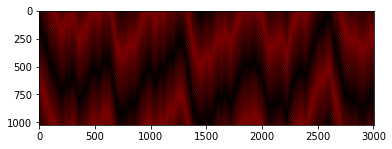

<Figure size 1440x1440 with 0 Axes>

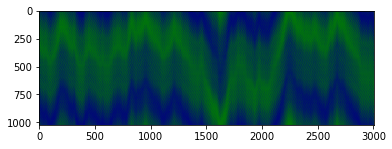

<Figure size 1440x1440 with 0 Axes>

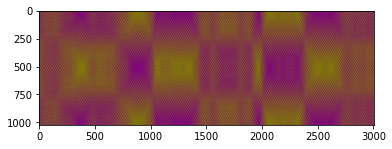

<Figure size 1440x1440 with 0 Axes>

In [20]:
importlib.reload(tws)
pat1 = tws.matmul(trd1, tu1, thr1)
pat1.plot(color=color1)
pat2 = tws.matmul(trd2, tu2, thr2)
pat2.plot(color=color2)
pat3 = tws.matmul(trd3, tu3, thr3)
pat3.plot(color=color3)

# Satin Mask

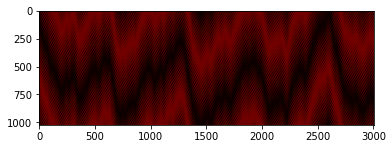

<Figure size 1440x1440 with 0 Axes>

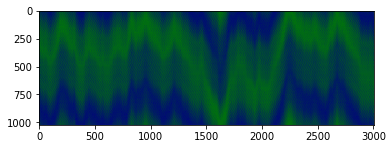

<Figure size 1440x1440 with 0 Axes>

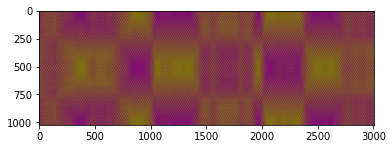

<Figure size 1440x1440 with 0 Axes>

In [21]:
importlib.reload(tws)
sat1 = pat1.satin(17,1,13)
# sat1 = pat1.satin(6,1,4)
# sat1.plot(save=True)
mask1 = pat1.mask(sat1)
mask1 = tws.Tensor(mask1)
mask1.plot(color=color1)
mask2 = pat2.mask(sat1)
mask2 = tws.Tensor(mask2)
mask2.plot(color=color2)
mask3 = pat3.mask(sat1)
mask3 = tws.Tensor(mask3)
mask3.plot(color=color3)
del pat1, pat2, pat3

In [22]:
a=torch.tensor([[2,3,1],[3,1,4]])
print(a==1)

tensor([[False, False,  True],
        [False,  True, False]])


# Basis for multiweave

## sequence

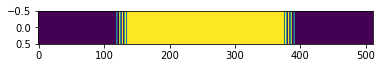

<Figure size 1440x1440 with 0 Axes>

In [23]:
def shade1(n, step=1):
    a = torch.arange(1,1+n//2, step)
    a_ = n-a
    a_ = a_.flip(0)
    b = torch.cat([a, a_], 0).reshape(1,-1)
    return sym(b)
def tone(n, wd=512, levels=[0.25,0.75], step=1):
    wd = wd - 2*n**2
    w0 = torch.tensor([wd * levels[0]]).long()
    w2 = torch.tensor([wd * levels[1]]).long()
    w1 = w2-w0
    w2 = wd-w2
    s = shade1(n, step=step)
    w = torch.cat([w0,s,w1,s,w2], 0)
    return w
tone(10,step=1)
test = tws.Seq(tone(4))
test.plot()
del test


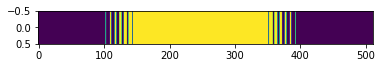

<Figure size 1440x1440 with 0 Axes>

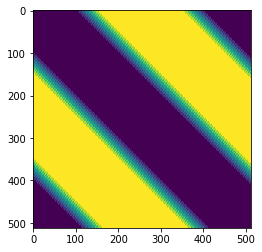

<Figure size 1440x1440 with 0 Axes>

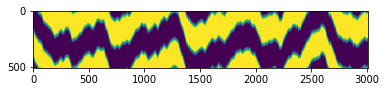

<Figure size 1440x1440 with 0 Axes>

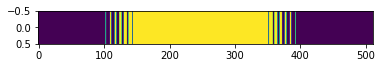

<Figure size 1440x1440 with 0 Axes>

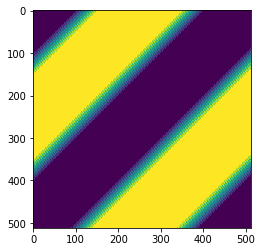

<Figure size 1440x1440 with 0 Axes>

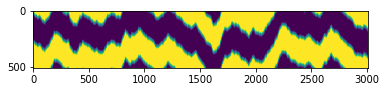

<Figure size 1440x1440 with 0 Axes>

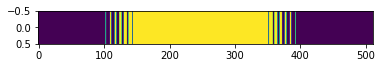

<Figure size 1440x1440 with 0 Axes>

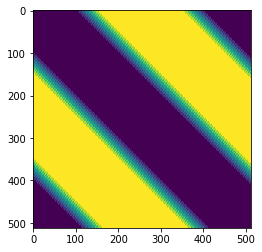

<Figure size 1440x1440 with 0 Axes>

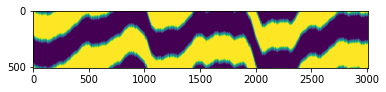

<Figure size 1440x1440 with 0 Axes>

In [24]:
importlib.reload(tws)
# baseSeq1 = seq1(128,64)
# baseSeq1 = baseSeq1.roll(8,dims=1)
# baseSeq1 = dotSeq(baseSeq1, itr=2, lng=20)
baseSeq1 = tws.Seq(tone(7, levels=lev1))
baseSeq1.plot()
base1 = baseSeq1.roll([1], diff = [3,7],wd=tuLen)
base1.plot(wd=tuLen)
base1 = tws.matmul(trd1, base1, thr1)
for i in range(4):
    base1 = tws.Tensor(base1.unisolate(low=4, high=4))
base1 = tws.Tensor(base1.unisolate(low=1,high=1,nbd=1))
base1.plot()

baseSeq2 = tws.Seq(tone(7, levels=lev2))
baseSeq2.plot()
base2 = baseSeq2.roll([-1], diff = [4,7],init=0, wd=tuLen)
base2.plot(wd=tuLen)
base2 = tws.matmul(trd2, base2, thr2)
for i in range(4):
    base2 = tws.Tensor(base2.unisolate(low=4, high=4))
base2 = tws.Tensor(base2.unisolate(low=1,high=1,nbd=1))
base2.plot()

baseSeq3 = tws.Seq(tone(7, levels=lev3))
baseSeq3.plot()
base3 = baseSeq3.roll([1], diff = [3,7],init=0, wd=tuLen)
base3.plot(wd=tuLen)
base3 = tws.matmul(trd3, base3, thr3)
for i in range(4):
    base3 = tws.Tensor(base3.unisolate(low=4, high=4))
base3 = tws.Tensor(base3.unisolate(low=1,high=1,nbd=1))
base3.plot()

# Triple weave

## base

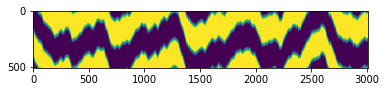

<Figure size 1440x1440 with 0 Axes>

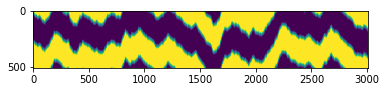

<Figure size 1440x1440 with 0 Axes>

21-0322-1334-10205819_


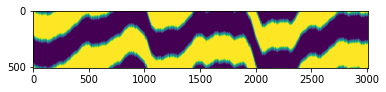

<Figure size 1440x1440 with 0 Axes>

21-0322-1334-10485462_


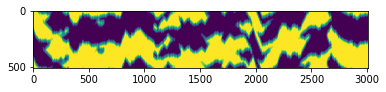

<Figure size 1440x1440 with 0 Axes>

21-0322-1334-10765714_


In [25]:
importlib.reload(tws)
from torchweave.structures import b_xor, b_and, b_or, b_not, clamp, mult, minus, plus

base_1 = base1.copy()
base_1.plot()

base_not_1 = b_not(base_1)
# base_not_1.plot()

base_2 = base2.copy()
base_2.plot(save=True)

base_not_2 = b_not(base_2)
# base_not_2.plot()

base_3 = base3.copy()
base_3.plot(save=True)
base_3 = tws.Tensor(torch.clamp(base_3.tensor.short() + base_2.tensor.short() - base_1.tensor.short(), 0, 1))
# for i in range(4):
#     base_3 = tws.Tensor(base_3.unisolate(low=4, high=4))
# base_3 = tws.Tensor(base_3.unisolate(low=1,high=1,nbd=1))
base_3.plot(save=True)
base_not_3 = b_not(base_3)
# base_not_3.plot()

del base1, base2, base3


## 多重織りの層の順序

In [26]:
b1 = 1
b2 = 1
b3_ = 1
b3 = (b3_+b2-b1 > 0)
for b1 in range(2):
    for b2 in range(2):
        for b3_ in range(2):
            b3 = int(b3_+b2-b1 > 0)
            print([b1,b2,b3])
            print('lay1', ['*', b1, b2], b1+b2)
            print('lay2', [int(not b1), '*', b3], int(not b1) + b3)
            print('lay3', [int(not b2), int(not b3), '*'], int(not b2) + int(not b3))



[0, 0, 0]
lay1 ['*', 0, 0] 0
lay2 [1, '*', 0] 1
lay3 [1, 1, '*'] 2
[0, 0, 1]
lay1 ['*', 0, 0] 0
lay2 [1, '*', 1] 2
lay3 [1, 0, '*'] 1
[0, 1, 1]
lay1 ['*', 0, 1] 1
lay2 [1, '*', 1] 2
lay3 [0, 0, '*'] 0
[0, 1, 1]
lay1 ['*', 0, 1] 1
lay2 [1, '*', 1] 2
lay3 [0, 0, '*'] 0
[1, 0, 0]
lay1 ['*', 1, 0] 1
lay2 [0, '*', 0] 0
lay3 [1, 1, '*'] 2
[1, 0, 0]
lay1 ['*', 1, 0] 1
lay2 [0, '*', 0] 0
lay3 [1, 1, '*'] 2
[1, 1, 0]
lay1 ['*', 1, 1] 2
lay2 [0, '*', 0] 0
lay3 [0, 1, '*'] 1
[1, 1, 1]
lay1 ['*', 1, 1] 2
lay2 [0, '*', 1] 1
lay3 [0, 0, '*'] 0


## 三重織りシミュレーション

### 表

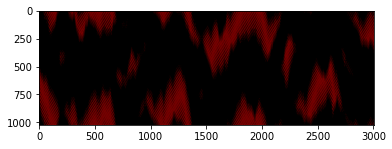

<Figure size 1440x1440 with 0 Axes>

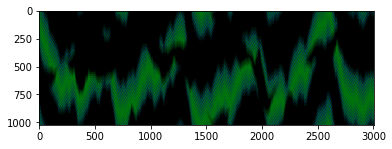

<Figure size 1440x1440 with 0 Axes>

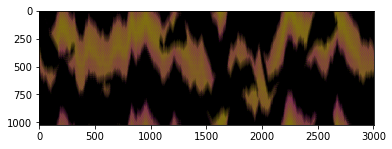

<Figure size 1440x1440 with 0 Axes>

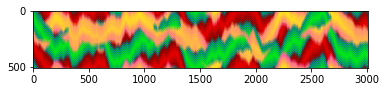

<Figure size 1440x1440 with 0 Axes>

21-0322-1334-12573623_color_front_


In [27]:
b1 = torch.logical_and(base_1.tensor, base_2.tensor)
b1 = torch.cat([b1,b1],0)
b1 = b1 * mask1.tensor
# b1 = torch.cat([b1,b1,b1], 2)
b2 = torch.logical_and(torch.logical_not(base_1.tensor), base_3.tensor)
b2 = torch.cat([b2,b2],0)
b2 = b2 * mask1.tensor
# b2 = torch.cat([b2,b2,b2], 2)
b3 = torch.logical_and(torch.logical_not(base_2.tensor), torch.logical_not(base_3.tensor))
b3 = torch.cat([b3,b3],0)
b3 = b3 * mask2.tensor
# b3 = torch.cat([b3,b3,b3], 2)

mask1_ = tws.Tensor(b1)
mask2_ = tws.Tensor(b2)
mask3_ = tws.Tensor(b3)
mask1_.plot(color=color1)
mask2_.plot(color=color2)
mask3_.plot(color=color3)
mask_ = mask1_.copy()
mask_.append(mask2_)
mask_.append(mask3_)

color7 = torch.cat([color1,color2,color3], 0).cuda()
# color6 = torch.cat([r,g,b,rg,gb,rb], 0).cuda()
mask_.plot(color=color7, sum=True, save=True, name='front')

del mask_, mask1_, mask2_, mask3_

### 表(銀糸/箔＋綿)

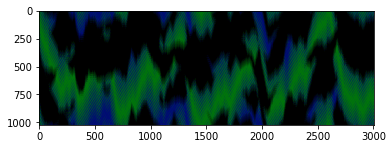

<Figure size 1440x1440 with 0 Axes>

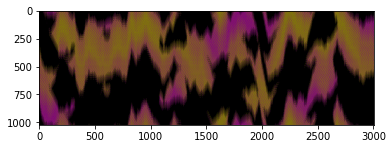

<Figure size 1440x1440 with 0 Axes>

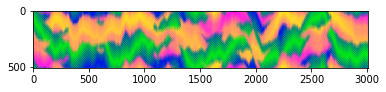

<Figure size 1440x1440 with 0 Axes>

21-0322-1334-14108808_color_front_haku_men_


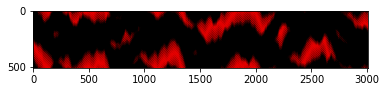

<Figure size 1440x1440 with 0 Axes>

21-0322-1334-14666785_color_front_ginshi_


In [28]:
importlib.reload(tws)
b1 = torch.logical_and(base_1.tensor, base_2.tensor)

b2 = torch.logical_and(torch.logical_not(base_1.tensor), base_3.tensor)
b2 = torch.logical_or(b2, torch.logical_and(b1, base_3.tensor))
b2 = torch.cat([b2,b2],0)
b2 = b2 * mask1.tensor

b3 = torch.logical_and(torch.logical_not(base_2.tensor), torch.logical_not(base_3.tensor))
b3 = torch.logical_or(b3, torch.logical_and(b1, torch.logical_not(base_3.tensor)))
b3 = torch.cat([b3,b3],0)
b3 = b3 * mask2.tensor

b1 = torch.cat([b1,b1],0)
b1 = b1 * mask1.tensor

mask1_ = tws.Tensor(b1)
mask2_ = tws.Tensor(b2)
mask3_ = tws.Tensor(b3)
mask2_.plot(color=color2)
mask3_.plot(color=color3)
mask_ = mask2_.copy()
mask_.append(mask3_)
gray = torch.tensor([200,200,200], dtype=torch.uint8).reshape(1,1,1,3)
white = torch.tensor([255,255,255], dtype=torch.uint8).reshape(1,1,1,3)
color8 = torch.cat([color2,color3], 0).cuda()
# color6 = torch.cat([r,g,b,rg,gb,rb], 0).cuda()
mask_.plot(color=color8, sum=True, save=True, name='front_haku_men')
mask1_.plot(color=color1, sum=True, save=True, name='front_ginshi')

del mask_, mask2_, mask3_

### 裏

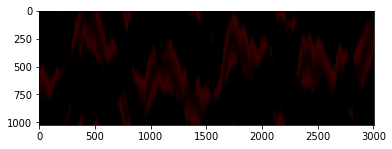

<Figure size 1440x1440 with 0 Axes>

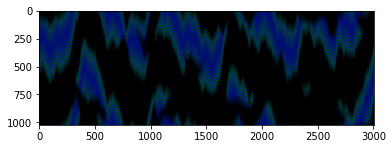

<Figure size 1440x1440 with 0 Axes>

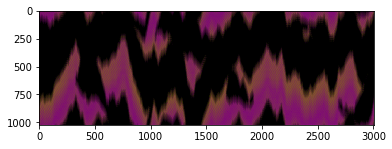

<Figure size 1440x1440 with 0 Axes>

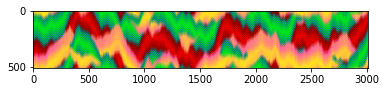

<Figure size 1440x1440 with 0 Axes>

21-0322-1334-16513687_color_back_


In [29]:
b1 = torch.logical_and(torch.logical_not(base_1.tensor), torch.logical_not(base_2.tensor))
b1 = torch.cat([b1,b1],0)
b1 = b1 * mask1.tensor
b1 = torch.flip(b1,(2,))

b2 = torch.logical_and(base_1.tensor, torch.logical_not(base_3.tensor))
b2 = torch.cat([b2,b2],0)
b2 = b2 * mask1.tensor
b2 = torch.flip(b2, (2,))

b3 = torch.logical_and(base_2.tensor, base_3.tensor)
b3 = torch.cat([b3,b3],0)
b3 = b3 * mask2.tensor
b3 = torch.flip(b3, (2,))

mask1_ = tws.Tensor(b1)
mask2_ = tws.Tensor(b2)
mask3_ = tws.Tensor(b3)
mask1_.plot(color=color1)
mask2_.plot(color=color2)
mask3_.plot(color=color3)
mask_ = mask1_.copy()
mask_.append(mask2_)
mask_.append(mask3_)
# color7 = torch.cat([color1,color2,color3], 0).cuda()
# color6 = torch.cat([r,g,b,rg,gb,rb], 0).cuda()

color7_back = torch.cat([color1_back,color2_back,color3_back], 0).cuda()
mask_.plot(color=color7_back, sum=True, save=True, name='back')
del mask_, mask1_, mask2_, mask3_

### 裏(銀糸/箔＋綿)

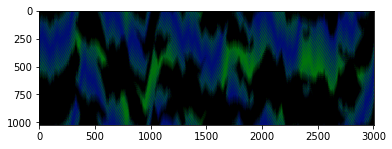

<Figure size 1440x1440 with 0 Axes>

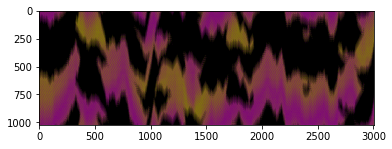

<Figure size 1440x1440 with 0 Axes>

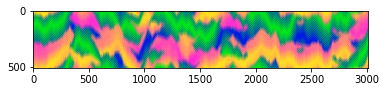

<Figure size 1440x1440 with 0 Axes>

21-0322-1334-18057722_color_back_haku_men_


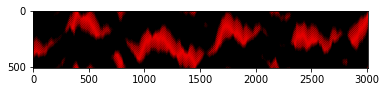

<Figure size 1440x1440 with 0 Axes>

21-0322-1334-18584324_color_back_ginshi_


In [30]:
b1 = torch.logical_and(torch.logical_not(base_1.tensor), torch.logical_not(base_2.tensor))


b2 = torch.logical_and(base_1.tensor, torch.logical_not(base_3.tensor))
b2 = torch.logical_or(b2, torch.logical_and(b1, torch.logical_not(base_3.tensor)))
b2 = torch.cat([b2,b2],0)
b2 = b2 * mask1.tensor
b2 = torch.flip(b2, (2,))

b3 = torch.logical_and(base_2.tensor, base_3.tensor)
b3 = torch.logical_or(b3, torch.logical_and(b1, base_3.tensor))
b3 = torch.cat([b3,b3],0)
b3 = b3 * mask2.tensor
b3 = torch.flip(b3, (2,))


b1 = torch.cat([b1,b1],0)
b1 = b1 * mask1.tensor
b1 = torch.flip(b1,(2,))

mask1_ = tws.Tensor(b1)
mask2_ = tws.Tensor(b2)
mask3_ = tws.Tensor(b3)
mask2_.plot(color=color2)
mask3_.plot(color=color3)
mask_ = mask2_.copy()
mask_.append(mask3_)
gray = torch.tensor([200,200,200], dtype=torch.uint8).reshape(1,1,1,3)
white = torch.tensor([255,255,255], dtype=torch.uint8).reshape(1,1,1,3)
color8_back = torch.cat([color2_back,color3_back], 0).cuda()
# color6 = torch.cat([r,g,b,rg,gb,rb], 0).cuda()
mask_.plot(color=color8_back, sum=True, save=True, name='back_haku_men')
mask1_.plot(color=color1_back, sum=True, save=True, name='back_ginshi')

del mask_, mask1_, mask2_, mask3_

## 多重織り，層ごとの出力

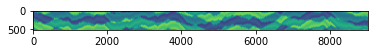

<Figure size 1440x1440 with 0 Axes>

21-0322-1334-19057061_ginshi_


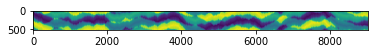

<Figure size 1440x1440 with 0 Axes>

21-0322-1334-19057061_ginshi_


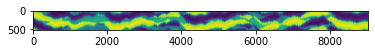

<Figure size 1440x1440 with 0 Axes>

21-0322-1334-19743280_haku_


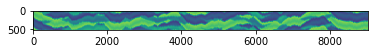

<Figure size 1440x1440 with 0 Axes>

21-0322-1334-19743280_haku_


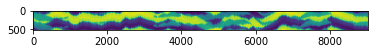

<Figure size 1440x1440 with 0 Axes>

21-0322-1334-20442006_men_


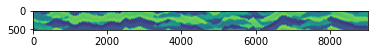

<Figure size 1440x1440 with 0 Axes>

21-0322-1334-20442006_men_


In [31]:
importlib.reload(tws)
def triple(t, lay):
    lay_ = []
    for i in t.tensor:
        i = torch.unsqueeze(i, 0)
        i = tws.Tensor(i)#[]
        if lay == 0:
            t_ = [i, base_1, base_2]#[*,1,0]
        elif lay == 1:
            t_ = [base_not_1, i, base_3]#0,*,0
        elif lay == 2:
            t_ = [base_not_2, base_not_3, i]#1,1,*
        t__ = tws.catTensor(t_)
        t__ = t__.wdJoint(n=3)
        lay_.append(t__)
    return tws.catTensor(lay_)
tri_lay1 = triple(mask1, 0)
tri_lay1.plot(save=True, name='ginshi')
tri_lay2 = triple(mask1, 1)
tri_lay2.plot(save=True, name='haku')
tri_lay3 = triple(mask2, 2)
tri_lay3.plot(save=True, name='men')

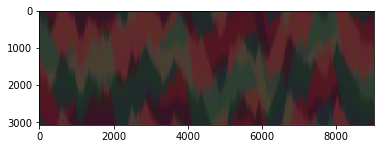

<Figure size 1440x1440 with 0 Axes>

21-0322-1334-21157965_color_all_


In [32]:
# importlib.reload(tws)
# r = torch.tensor([255,0,0], dtype=torch.uint8).reshape(1,1,1,3)
# rg = torch.tensor([255,255,0], dtype=torch.uint8).reshape(1,1,1,3)
# g = torch.tensor([0,255,0], dtype=torch.uint8).reshape(1,1,1,3)
# b = torch.tensor([0,0,255], dtype=torch.uint8).reshape(1,1,1,3)
# gb = torch.tensor([0,255,255], dtype=torch.uint8).reshape(1,1,1,3)
# rb = torch.tensor([255,0,255], dtype=torch.uint8).reshape(1,1,1,3)
# color6 = torch.cat([r,g,b,rg,gb,rb], 0).cuda()

tri = tri_lay1.copy()
tri.append(tri_lay2)
tri.append(tri_lay3)
tri.plot(color=color7, save=True, name='all')
del tri

In [33]:
torch.cuda.empty_cache() 